**PROBLEM STATEMENT:**

Olist, a Brazilian ecommerce marketplace, is experiencing concerns from sellers regarding delayed deliveries and decreased conversion rates. The company aims to identify friction points in the purchase-to-delivery funnel and conduct experiments to improve seller performance and customer experience. The objective is to diagnose these issues, propose data-backed improvements and offer useful insights through dashboards and experiments. 


**TASK 1: A/B Testing to Find the Impact of Payment Method on Order Value**

**Control Group(Group A):** Credit Card Users

**Treatment Group(Group B):** Boleto/Voucher Users

**DATA WRANGLING**

In [4]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

In [5]:
customers=pd.read_csv('olist_customers_dataset.csv')
geolocation=pd.read_csv('olist_geolocation_dataset.csv')
order_items=pd.read_csv('olist_order_items_dataset.csv')
order_payments= pd.read_csv('olist_order_payments_dataset.csv')
order_reviews= pd.read_csv('olist_order_reviews_dataset.csv')
orders=pd.read_csv('olist_orders_dataset.csv')
products=pd.read_csv('olist_products_dataset.csv')
sellers=pd.read_csv('olist_sellers_dataset.csv')
product_category=pd.read_csv('product_category_name_translation.csv')

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [8]:
products=products.merge(product_category, how='inner', on='product_category_name')

In [9]:
products.drop(columns='product_category_name', inplace=True)

In [10]:
products.rename(columns ={'product_category_name_english':'category_name', 'product_description_lenght': 'product_description_length', 'product_name_lenght': 'product_name_length'}, inplace=True)

In [11]:
products.head()

,product_id,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [12]:
customers=customers.merge(orders, on='customer_id', how= 'inner')

In [13]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


In [14]:
customers=customers.merge(order_items, on='order_id', how='inner')

In [15]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


In [16]:
customers=customers.merge(order_payments, on='order_id', how='inner')

In [17]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,1,credit_card,2,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,1,credit_card,8,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,1,credit_card,7,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,1,credit_card,1,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,1,credit_card,8,252.25


In [18]:
customers=customers.merge(order_reviews, on='order_id', how='inner')

In [19]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,1,credit_card,2,146.87,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,1,credit_card,8,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,1,credit_card,7,157.73,5ad6695d76ee186dc473c42706984d87,5,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,1,credit_card,1,173.30,059a801bb31f6aab2266e672cab87bc5,5,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,1,credit_card,8,252.25,8490879d58d6c5d7773f2739a03f089a,5,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52


In [20]:
customers=customers.merge(products, on='product_id', how='inner')

In [21]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,category_name
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,1,credit_card,2,146.87,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,1,credit_card,8,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,1,credit_card,7,157.73,5ad6695d76ee186dc473c42706984d87,5,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,1,credit_card,1,173.30,059a801bb31f6aab2266e672cab87bc5,5,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,office_furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,1,credit_card,8,252.25,8490879d58d6c5d7773f2739a03f089a,5,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,home_confort


In [22]:
customers=customers.merge(sellers, on='seller_id', how='inner')

In [23]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,category_name,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,1,credit_card,2,146.87,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,1,credit_card,8,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares,88303,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,1,credit_card,7,157.73,5ad6695d76ee186dc473c42706984d87,5,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,office_furniture,8577,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,1,credit_card,1,173.30,059a801bb31f6aab2266e672cab87bc5,5,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,office_furniture,8577,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,1,credit_card,8,252.25,8490879d58d6c5d7773f2739a03f089a,5,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,home_confort,14940,ibitinga,SP


In [24]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [25]:
customers.duplicated().sum()

0

In [26]:
customers.isnull().mean()

customer_id                      0.000000
customer_unique_id               0.000000
customer_zip_code_prefix         0.000000
customer_city                    0.000000
customer_state                   0.000000
order_id                         0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.000121
order_delivered_carrier_date     0.010337
order_delivered_customer_date    0.020760
order_estimated_delivery_date    0.000000
order_item_id                    0.000000
product_id                       0.000000
seller_id                        0.000000
shipping_limit_date              0.000000
price                            0.000000
freight_value                    0.000000
payment_sequential               0.000000
payment_type                     0.000000
payment_installments             0.000000
payment_value                    0.000000
review_id                        0.000000
review_score                     0

We can observe that the null values are very less, so its better to impute them rather then removing.

First, we will drop the columns review_comment_title  and review_comment_message as they not only have large percent of null values, but also are not as crucial for our analysis.

In [29]:
customers= customers.drop(columns=['review_comment_title', 'review_comment_message'])

In [30]:
customers.describe()

,customer_zip_code_prefix,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix
count,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115608.000000,115608.000000,115608.000000,115608.000000,115609.000000
mean,35061.537597,1.194535,120.619850,20.056880,1.093747,2.946233,172.387379,4.034409,48.766541,785.808198,2.205373,2113.907697,30.307903,16.638477,23.113167,24515.713958
std,29841.671732,0.685926,182.653476,15.836184,0.729849,2.781087,265.873969,1.385584,10.034187,652.418619,1.717771,3781.754895,16.211108,13.473570,11.755083,27636.640968
min,1003.000000,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000,1.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000
25%,11310.000000,1.000000,39.900000,13.080000,1.000000,1.000000,60.870000,4.000000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6429.000000
50%,24241.000000,1.000000,74.900000,16.320000,1.000000,2.000000,108.050000,5.000000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,13660.000000
75%,58745.000000,1.000000,134.900000,21.210000,1.000000,4.000000,189.480000,5.000000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,28605.000000
max,99980.000000,21.000000,6735.000000,409.680000,29.000000,24.000000,13664.080000,5.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000


In [31]:
measurement= ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']

for col in measurement:
   customers[col]= customers[col].fillna(customers[col].median())

Since these columns have outliers, it is better to impute them with median values to maintain the data distribution.

In [33]:
customers.isnull().mean()

customer_id                      0.000000
customer_unique_id               0.000000
customer_zip_code_prefix         0.000000
customer_city                    0.000000
customer_state                   0.000000
order_id                         0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.000121
order_delivered_carrier_date     0.010337
order_delivered_customer_date    0.020760
order_estimated_delivery_date    0.000000
order_item_id                    0.000000
product_id                       0.000000
seller_id                        0.000000
shipping_limit_date              0.000000
price                            0.000000
freight_value                    0.000000
payment_sequential               0.000000
payment_type                     0.000000
payment_installments             0.000000
payment_value                    0.000000
review_id                        0.000000
review_score                     0

In [34]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,category_name,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,1,credit_card,2,146.87,88b8b52d46df026a9d1ad2136a59b30b,4,2017-05-26 00:00:00,2017-05-30 22:34:40,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,1,credit_card,8,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5,2018-01-30 00:00:00,2018-02-10 22:43:29,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares,88303,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,1,credit_card,7,157.73,5ad6695d76ee186dc473c42706984d87,5,2018-06-15 00:00:00,2018-06-15 12:10:59,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,office_furniture,8577,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,1,credit_card,1,173.30,059a801bb31f6aab2266e672cab87bc5,5,2018-03-29 00:00:00,2018-04-02 18:36:47,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,office_furniture,8577,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,1,credit_card,8,252.25,8490879d58d6c5d7773f2739a03f089a,5,2018-08-10 00:00:00,2018-08-17 01:59:52,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,home_confort,14940,ibitinga,SP


In [35]:
date_col =['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_date', 'review_creation_date', 'review_answer_timestamp']

for col in date_col:
    customers[col]=pd.to_datetime(customers[col])

In [36]:
customers.dtypes

customer_id                              object
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
order_id                                 object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
order_item_id                             int64
product_id                               object
seller_id                                object
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           float64
payment_sequential                        int64
payment_type                             object
payment_installments                    

We can observe that all the datetime columns have been converted to right format. Now we can proceed with imputing missing values for the columns: 'order_approved_at', 'order_delivered_carrier_date', and 'order_delivered_customer_date'.

In [38]:
customers = customers.dropna(subset=[
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date'
])


In [39]:
customers.isnull().mean()

customer_id                      0.0
customer_unique_id               0.0
customer_zip_code_prefix         0.0
customer_city                    0.0
customer_state                   0.0
order_id                         0.0
order_status                     0.0
order_purchase_timestamp         0.0
order_approved_at                0.0
order_delivered_carrier_date     0.0
order_delivered_customer_date    0.0
order_estimated_delivery_date    0.0
order_item_id                    0.0
product_id                       0.0
seller_id                        0.0
shipping_limit_date              0.0
price                            0.0
freight_value                    0.0
payment_sequential               0.0
payment_type                     0.0
payment_installments             0.0
payment_value                    0.0
review_id                        0.0
review_score                     0.0
review_creation_date             0.0
review_answer_timestamp          0.0
product_name_length              0.0
p

In [40]:
customers.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp', 'product_name_length',
       'product_description_length', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'category_name', 'seller_zip_code_prefix', 'seller_city',
       'seller_state'],
      dtype='object')

**A/B Testing**

In [42]:
customers_copy= customers.copy()
customers_copy = customers_copy.reset_index(drop=True)

First we will check whether the column 'payment value' has outliers or not, since it will play the most crucial role in our test

In [44]:
customers_copy['payment_value'].describe()

count    113194.000000
mean        171.573731
std         264.250066
min           0.000000
25%          60.850000
50%         107.970000
75%         189.157500
max       13664.080000
Name: payment_value, dtype: float64

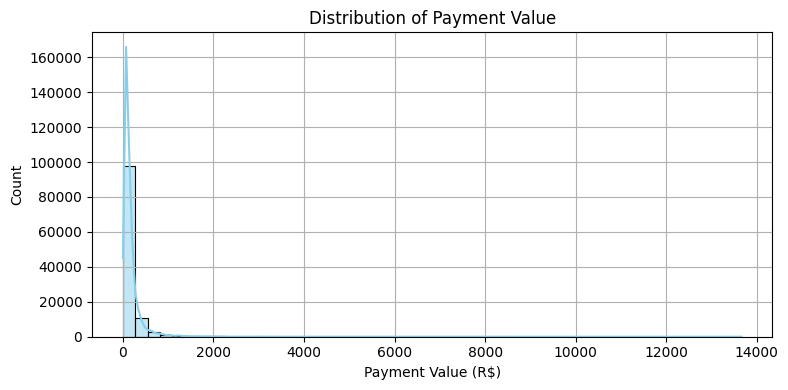

In [45]:


plt.figure(figsize=(8, 4))
sns.histplot(customers_copy['payment_value'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Payment Value")
plt.xlabel("Payment Value (R$)")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()


---

We can observe that our column has extremely skewed data so we will perform outlier capping 

In [48]:
Q1 = customers_copy['payment_value'].quantile(0.25)
Q3 = customers_copy['payment_value'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Capping the outliers
customers_copy = customers_copy[
    (customers_copy['payment_value'] >= lower_bound) &
    (customers_copy['payment_value'] <= upper_bound)
]


We will then make three seperate groups of customers: A, B, and others depending upon the payment type those customers used.

In [50]:
# Group A: Credit card users
# Group B: Boleto or Voucher users
customers_copy['payment_group'] = customers_copy['payment_type'].apply(
    lambda x: 'A' if x == 'credit_card' else ('B' if x in ['boleto', 'voucher'] else 'Other')
)

In [51]:
# We will filter only A and B for our testing
customers_testing = customers_copy[customers_copy['payment_group'].isin(['A', 'B'])]

In [52]:
customers_testing.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,category_name,seller_zip_code_prefix,seller_city,seller_state,payment_group
11524,b57974de46d4b2474514538cf1451c99,76f0e78bdfd54fe1902260715d2428e9,13520,sao pedro,SP,77ed87f3ac41afc8135ce7cf831691d5,delivered,2018-04-11 17:49:01,2018-04-11 18:10:49,2018-04-17 20:13:24,2018-04-25 01:36:20,2018-04-27,1,d4dccae17c83ffbaafc50d763503e9eb,4bfc7a4a1cf8d4d2121c27422d9e50b5,2018-04-17 18:10:49,62.9,13.80,1,credit_card,1,76.70,0ef6911dba6a01f29b67f2b8726f6035,5,2018-04-25,2018-04-25 21:57:51,59.0,474.0,1.0,3070.0,32.0,11.0,29.0,housewares,3111,sao paulo,SP,A
82512,4194848ead37f7778bef2a42bcaa4f8e,22e0898113b8495471e089b22918f7d1,12061,taubate,SP,ba67c6b69ba40e05d03595b0b0730437,delivered,2017-11-24 11:05:48,2017-11-24 13:13:17,2017-11-29 22:38:55,2017-12-26 18:59:06,2017-12-19,1,5b3b5f9ae84ca9ead3138b199420cc94,adbc26658d6c7b4b6219f9d934598091,2017-11-30 13:13:17,139.0,18.22,1,credit_card,4,157.22,7ff1d51509238e81b07d39323fc31960,1,2017-12-20,2017-12-20 16:30:19,48.0,1146.0,7.0,5400.0,20.0,60.0,50.0,toys,81770,curitiba,PR,A
109163,ec19c50d2dffbbac741ae04db916de32,daa95fea6e6c81a479ab2357139c148e,88780,imbituba,SC,91d0935ba0d6f6300d7f5af5f2eb05ce,delivered,2018-01-06 21:22:25,2018-01-06 21:30:26,2018-01-08 14:19:19,2018-01-29 15:48:04,2018-02-05,1,6803077179d24889430188e03fafd31a,128639473a139ac0f3e5f5ade55873a5,2018-01-11 21:30:26,19.9,15.10,1,credit_card,3,35.00,a69d07d26ce3a057bd5d17cee7b25583,5,2018-01-30,2018-05-06 23:30:41,48.0,287.0,1.0,100.0,23.0,8.0,18.0,electronics,87050,maringa,PR,A
86931,e1c409b2499704247a1dbb5b7f96d78f,a59fb29abf279cac3c8777a5e7d3da24,15080,sao jose do rio preto,SP,df258d3d30d51b9991fe71bb0e4f126c,delivered,2017-06-29 13:25:04,2017-06-29 13:44:01,2017-06-30 07:35:28,2017-07-05 14:27:42,2017-07-19,2,574597aaf385996112490308e37399ce,febab0275244b9a49a623f0bd613ca2f,2017-07-05 13:44:01,49.0,13.37,1,credit_card,10,124.74,f95f7ab24a3ff4d7461cdeaa5155a1f8,5,2017-07-06,2017-07-07 18:43:40,55.0,499.0,1.0,4800.0,22.0,63.0,22.0,housewares,13920,pedreira,SP,A
27604,773b672fa164724437f6e8b82b6e0f06,43f121a6763a0d307455e42f64592634,41650,salvador,BA,88d3ffbd9471d0ba780fd0370a0d7892,delivered,2018-07-05 16:50:26,2018-07-06 16:51:17,2018-07-13 11:18:00,2018-07-26 20:54:27,2018-08-07,1,d285360f29ac7fd97640bf0baef03de0,2eb70248d66e0e3ef83659f71b244378,2018-07-18 16:51:17,199.9,18.33,1,credit_card,4,218.23,09d02cb21d08b7abbc92d2f2b8ab6521,1,2018-07-27,2018-08-03 21:16:21,46.0,501.0,4.0,363.0,18.0,13.0,13.0,watches_gifts,13101,campinas,SP,A


We can observe that we have successfully simulated two groups depending on payment type (Credit Card vs Boleto/Voucher)

Next, we will find the average payment value for both groups and check if there is statistically significant difference or not.

In [54]:
from scipy.stats import ttest_ind

# Grouped payment values
group_a_payment = customers_testing[customers_testing['payment_group'] == 'A']['payment_value']
group_b_payment = customers_testing[customers_testing['payment_group'] == 'B']['payment_value']

# Mean comparison
print("Avg Payment Value (Group A - Credit Card):", group_a_payment.mean())
print("Avg Payment Value (Group B - Boleto/Voucher):", group_b_payment.mean())

# T-test
t_stat, p_val = ttest_ind(group_a_payment, group_b_payment, equal_var=False)
print("T-statistic:", t_stat)
print("p-value:", p_val)

if p_val < 0.05:
    print("✅ Statistically significant difference in spending.")
else:
    print("❌ No significant difference in spending.")
                                

Avg Payment Value (Group A - Credit Card): 125.1942443199665
Avg Payment Value (Group B - Boleto/Voucher): 104.07221848353917
T-statistic: 37.06274622914612
p-value: 2.3012624807386452e-296
✅ Statistically significant difference in spending.


In [55]:
# Now we will divide the payment value for both the groups to visualise it.
avg_payment = customers_testing.groupby('payment_group')['payment_value'].mean().reset_index()
avg_payment.columns = ['Payment Method Group', 'Average Payment Value']

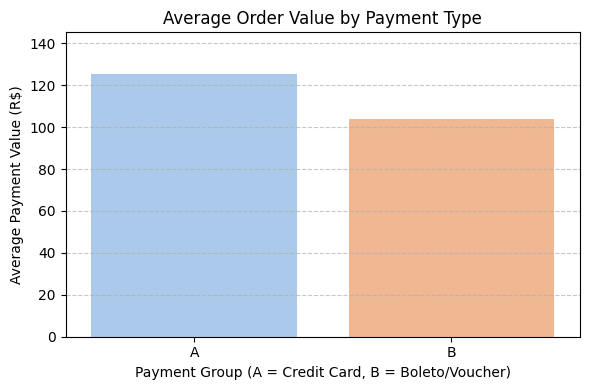

In [56]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Payment Method Group', y='Average Payment Value', hue= 'Payment Method Group', data=avg_payment, palette='pastel')
plt.title('Average Order Value by Payment Type')
plt.ylabel('Average Payment Value (R$)')
plt.xlabel('Payment Group (A = Credit Card, B = Boleto/Voucher)')
plt.ylim(0, avg_payment['Average Payment Value'].max() + 20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**SUMMARY**

Customers who pay using credit cards spend significantly more per order (125.53) compared to those using boleto or vouchers (104.36), with a statistically significant difference (p ≈  3.19e-302).

This suggests that:

1. Credit card users represent a high-value customer segment.

2. Encouraging prepaid methods like credit cards could increase average order value and revenue per transaction.

**Checkout flows can be optimized by:**

Highlighting credit card as the default option

Offering small discounts or loyalty points for using prepaid methods

In [58]:
customers_copy2=customers.copy()
customers_copy2 = customers_copy2.reset_index(drop=True)

In [59]:
customers_copy2.to_csv('delivery_bottleneck.csv', index=False)

In [76]:
columns_cap = ['approval_to_shipping', 'delivery_duration']
customers_copy2 = cap_iqr(customers_copy2, columns_cap)

✅ Capped 'approval_to_shipping' between [0, 7.5]
✅ Capped 'delivery_duration' between [0, 28.5]


In [77]:
customers_copy2['approval_to_shipping'].describe()

count    113194.000000
mean          2.034891
std           2.211053
min          -4.000000
25%           0.000000
50%           1.000000
75%           3.000000
max           7.500000
Name: approval_to_shipping, dtype: float64

In [78]:
customers_copy2['delivery_duration'].describe()

count    113194.000000
mean         11.411153
std           7.054217
min           0.000000
25%           6.000000
50%          10.000000
75%          15.000000
max          28.500000
Name: delivery_duration, dtype: float64

In [140]:
customers_copy2.to_csv('customers_final.csv', index=False)